# Librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carga de datos

In [ ]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del train balanceado
url = '/content/drive/MyDrive/Tesis/df_train_balanceado.csv'

try:
    df_train_balanceado = pd.read_csv(url)
    print("Archivo cargado corecto de train balanceado")
except Exception as e:
    print(f"Error al cargar el archivo CSV de train balanceado: {e}")

Archivo cargado corecto de train balanceado


In [ ]:
# Muestra las primeras filas del DataFrame
df_train_balanceado.head().T

,0,1,2,3,4
category,home,misc_net,entertainment,shopping_pos,grocery_net
amt,15.0,109.96,10.43,5.71,39.7
city,Moriarty,Burbank,Eugene,Redford,Arnold
state,New Mexico,Washington,Oregon,Missouri,Missouri
lat,34.9889,46.1966,44.0385,37.3272,38.4305
long,-106.0609,-118.9017,-123.0614,-91.0243,-90.387
city_pop,7268,3684,191096,241,35439
merch_lat,35.191886,45.563869,44.708545,36.85701,38.952935
merch_long,-105.832554,-118.076592,-122.072096,-91.002408,-90.990324
age,31,39,55,46,35


In [ ]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del test
url = '/content/drive/MyDrive/Tesis/test.csv'

try:
    df_test = pd.read_csv(url)
    print("Archivo cargado corecto de test")
except Exception as e:
    print(f"Error al cargar el archivo CSV de test: {e}")

Archivo cargado corecto de test


In [ ]:
# Muestra las primeras filas del DataFrame
df_test.head().T

,0,1,2,3,4
category,home,grocery_net,shopping_net,travel,misc_pos
amt,30.02,48.31,80.94,5.28,68.7
city,Arnold,Dumont,Blairsden-Graeagle,Cascade Locks,Sun City
state,Missouri,Colorado,California,Oregon,California
lat,38.4305,39.7532,39.8127,45.671,33.7467
long,-90.387,-105.6356,-120.6405,-121.8686,-117.1721
city_pop,35439,565,1725,1288,54287
merch_lat,39.256111,40.504011,39.595713,46.504832,33.932468
merch_long,-91.262386,-106.561224,-120.16454,-121.68543,-116.294259
age,35,41,53,83,47


In [ ]:
# Columnas de df_train_balanceado
df_train_balanceado.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

In [ ]:
# Columnas de df_test
df_test.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

# EDA

In [ ]:
# Muestra información del DataFrame df_train_balanceado
df_train_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  20160 non-null  object 
 1   amt                       20160 non-null  float64
 2   city                      20160 non-null  object 
 3   state                     20160 non-null  object 
 4   lat                       20160 non-null  float64
 5   long                      20160 non-null  float64
 6   city_pop                  20160 non-null  int64  
 7   merch_lat                 20160 non-null  float64
 8   merch_long                20160 non-null  float64
 9   age                       20160 non-null  int64  
 10  transaction_hour          20160 non-null  int64  
 11  transaction_day_of_month  20160 non-null  int64  
 12  transaction_month         20160 non-null  int64  
 13  transaction_year          20160 non-null  int64  
 14  transa

# Preprocesamiento

Separando los datos en X_train, y_train, X_test, y_test

In [ ]:
# X_train todas las columnas de df_train_balanceado menos 'is_fraud'
X_train = df_train_balanceado.drop('is_fraud', axis=1)

In [ ]:
# y_train solo columna 'is_fraud' de df_train_balanceado
y_train =  df_train_balanceado['is_fraud']

In [ ]:
# X_test todas las columnas de df_test menos 'is_fraud'
X_test = df_test.drop('is_fraud', axis=1)

In [ ]:
# y_test solo columna 'is_fraud' de df_test
y_test =  df_test['is_fraud']

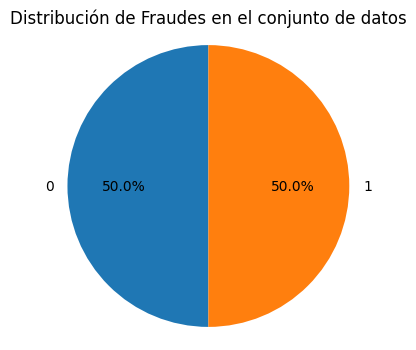

In [ ]:
# Verifica si la columna 'is_fraud' existe en el DataFrame
if 'is_fraud' in df_train_balanceado.columns:
    # Cuenta la cantidad de cada valor en la columna 'is_fraud'
    conteo_fraude = df_train_balanceado['is_fraud'].value_counts()

    # Crea el gráfico de pastel
    plt.figure(figsize=(4, 4))
    plt.pie(conteo_fraude, labels=conteo_fraude.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Fraudes en el conjunto de datos')
    plt.axis('equal')  # Asegura que el gráfico sea un círculo
    plt.show()
else:
    print("La columna 'is_fraud' no se encuentra en el DataFrame.")

#Identificacion de Outlers en columnas numericas y porcentaje de outlers por variable

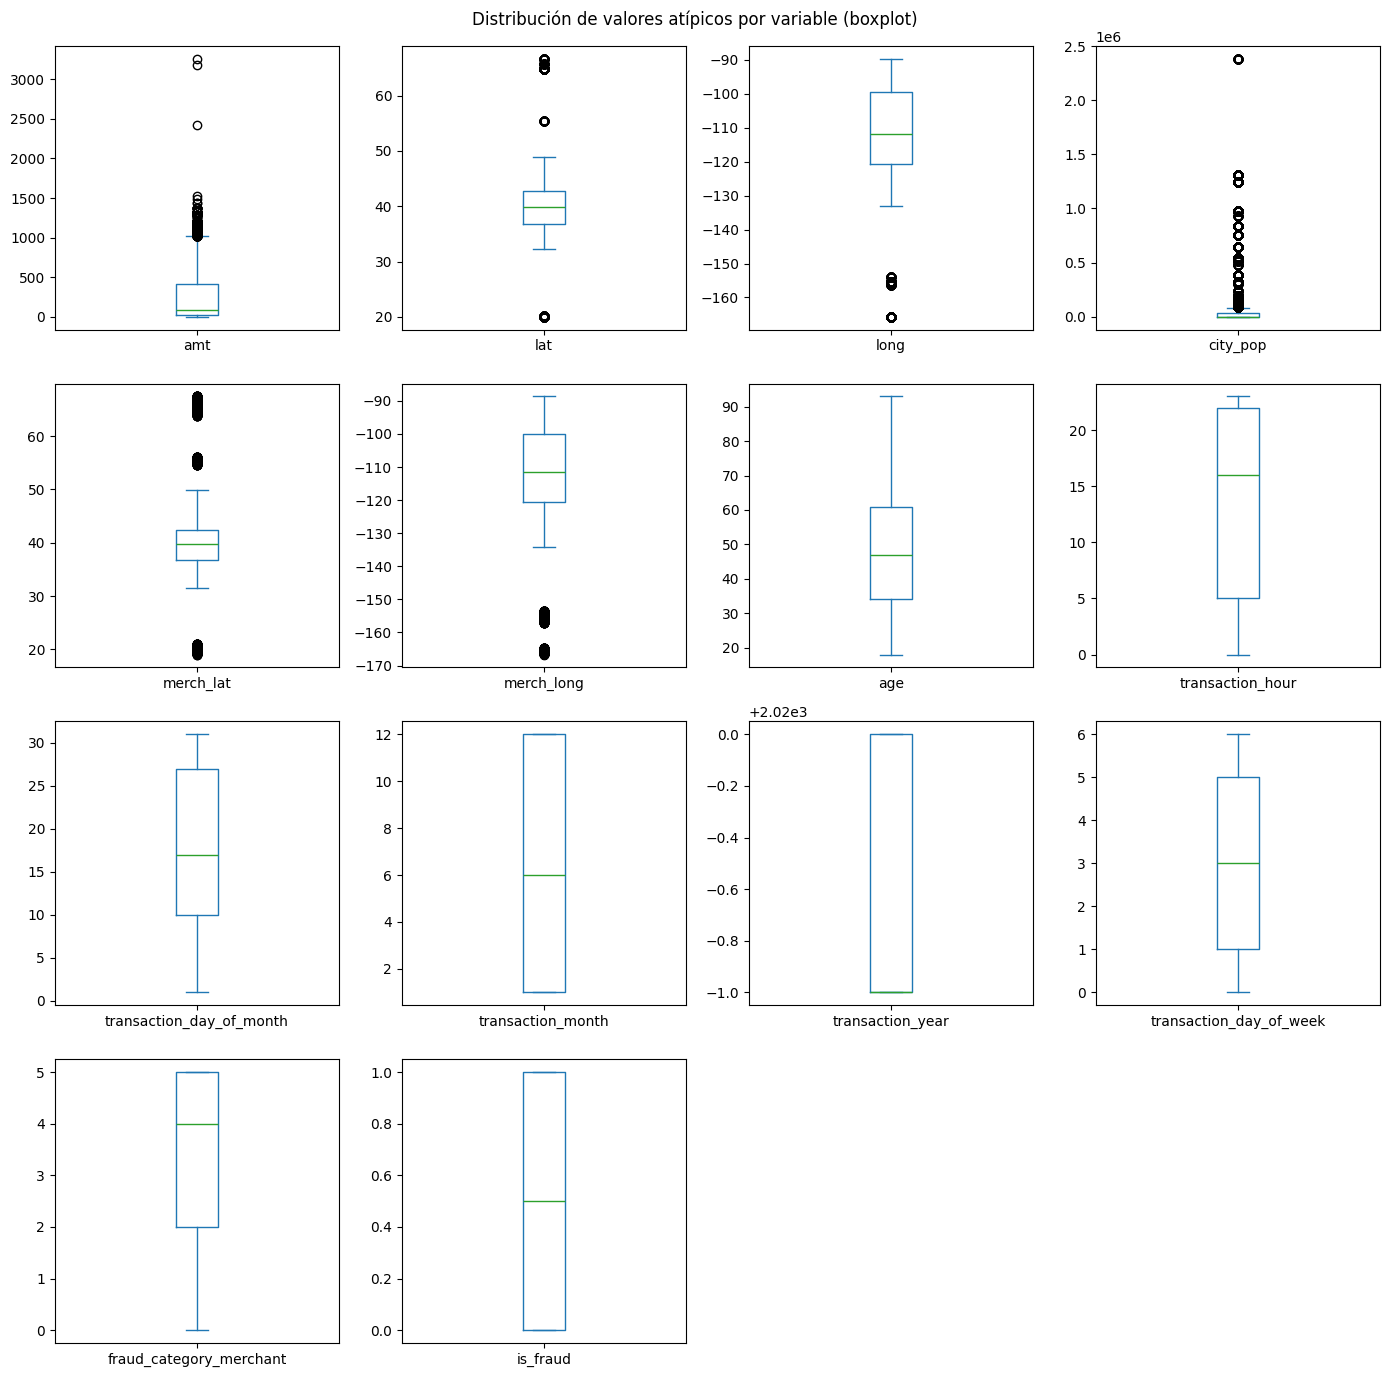

Porcentaje de Outliers por Variable:
                    Variable  Porcentaje_Outliers
0                        amt             5.486111
1                        lat             3.115079
2                       long             2.787698
3                   city_pop            19.806548
4                  merch_lat             3.115079
5                 merch_long             2.787698
6                        age             0.000000
7           transaction_hour             0.000000
8   transaction_day_of_month             0.000000
9          transaction_month             0.000000
10          transaction_year             0.000000
11   transaction_day_of_week             0.000000
12   fraud_category_merchant             0.000000
13                  is_fraud             0.000000


In [ ]:
# Filtrar solo las columnas numéricas
df_numerico = df_train_balanceado.select_dtypes(include=[np.number])

# Visualizar valores atípicos usando boxplots
def visualizar_outliers(data):
    df_train_balanceado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
    plt.suptitle("Distribución de valores atípicos por variable (boxplot)")
    plt.tight_layout()
    plt.show()

# Identificar outliers usando el rango intercuartílico (IQR)
def detectar_outliers_iqr(data):
    outliers_info = {}
    for columna in data.columns:
        Q1 = data[columna].quantile(0.25)
        Q3 = data[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data[columna] < (Q1 - 1.5 * IQR)) | (data[columna] > (Q3 + 1.5 * IQR))]
        porcentaje_outliers = 100 * len(outliers) / len(data)
        outliers_info[columna] = porcentaje_outliers
    return pd.DataFrame(list(outliers_info.items()), columns=['Variable', 'Porcentaje_Outliers'])

# Llamar a las funciones en el DataFrame con solo columnas numéricas
visualizar_outliers(df_numerico)
outliers_info = detectar_outliers_iqr(df_numerico)

# Mostrar el porcentaje de outliers por variable
print("Porcentaje de Outliers por Variable:")
print(outliers_info)

#Graficar la correlacion entre las columnas

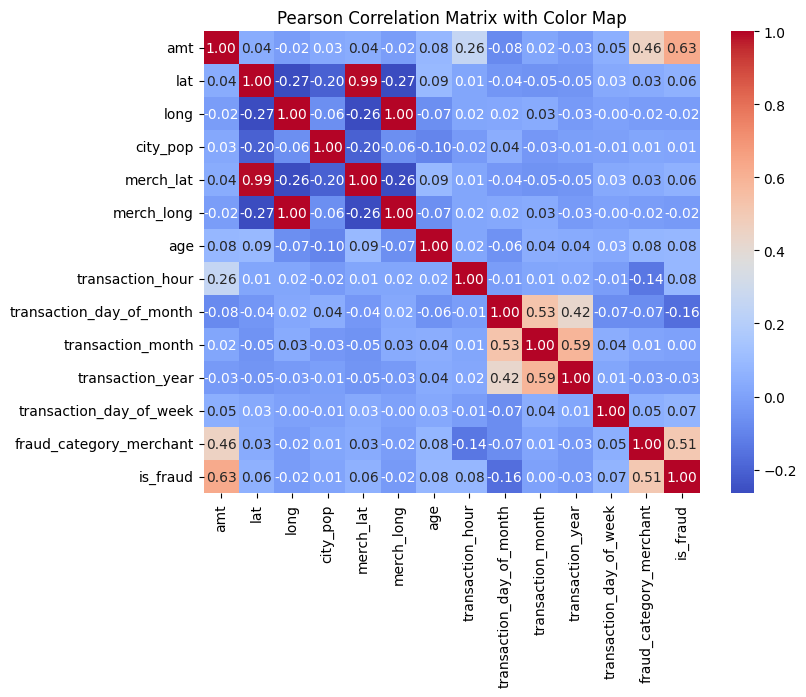

In [ ]:
# Select numerical columns from df_train_balanceado
numerical_cols = df_train_balanceado.select_dtypes(include=['number'])

# Calculate the Pearson correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap with a color map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix with Color Map')
plt.show()

#Copia de dataframes para preprocesamiento de datos

In [ ]:
# copia de X_train y X_test
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

#Obtener columnas numericas

In [ ]:
# Obtener las columnas numéricas de X_train
columnas_numericas = X_train_copy.select_dtypes(include=['number']).columns

# Imprimir las columnas numéricas
columnas_numericas

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week',
       'fraud_category_merchant'],
      dtype='object')

#Obtener columnas categoricas

In [ ]:
# Obtener las columnas categóricas  X_train
columnas_categoricas = X_train_copy.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas
columnas_categoricas

Index(['category', 'city', 'state', 'profession_group'], dtype='object')

#Seleccion de columnas relevantes, transformacion logaritmica, Codificacion y aplicacion de standarscaler

In [ ]:
# Seleccionar solo las columnas relevantes en los datos de entrenamiento y prueba
columnas_relevantes = ['category', 'amt', 'city', 'state', 'age',
                       'transaction_hour', 'transaction_day_of_month',
                       'transaction_day_of_week', 'profession_group',
                       'fraud_category_merchant']

X_train_filtrado = X_train[columnas_relevantes].copy()
X_test_filtrado = X_test[columnas_relevantes].copy()

# Aplicar la transformación logarítmica a la columna 'amt' (manteniendo el mismo nombre)
X_train_filtrado['amt'] = np.log1p(X_train_filtrado['amt'])
X_test_filtrado['amt'] = np.log1p(X_test_filtrado['amt'])

# Columnas numéricas (incluyendo 'amt' ya transformada)
columnas_numericas = ['amt', 'age', 'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week']

# Columnas categóricas para OneHotEncoder y LabelEncoder
columnas_onehot = ['category', 'city', 'state']
columnas_label = ['profession_group', 'fraud_category_merchant']

# Aplicar LabelEncoder a las columnas categóricas ordinales
for col in columnas_label:
    le = LabelEncoder()
    X_train_filtrado.loc[:, col] = le.fit_transform(X_train_filtrado[col])
    X_test_filtrado.loc[:, col] = le.transform(X_test_filtrado[col])

# Configurar el preprocesador con StandardScaler para numéricas y OneHotEncoder para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(drop='first'), columnas_onehot)
    ])

# Aplicar el preprocesador a los datos de entrenamiento y prueba y asegurar formato denso
X_train_preprocesado = preprocessor.fit_transform(X_train_filtrado)
X_test_preprocesado = preprocessor.transform(X_test_filtrado)

# Convertir a formato denso si es necesario
X_train_preprocesado = X_train_preprocesado.toarray() if hasattr(X_train_preprocesado, "toarray") else X_train_preprocesado
X_test_preprocesado = X_test_preprocesado.toarray() if hasattr(X_test_preprocesado, "toarray") else X_test_preprocesado

# Crear DataFrame con nombres de columna para verificar
try:
    X_train_preprocesado_df = pd.DataFrame(X_train_preprocesado, columns=preprocessor.get_feature_names_out())
    X_test_preprocesado_df = pd.DataFrame(X_test_preprocesado, columns=preprocessor.get_feature_names_out())

    print("Datos de entrenamiento preprocesados:")
    print(X_train_preprocesado_df.head())

    print("\nDatos de prueba preprocesados:")
    print(X_test_preprocesado_df.head())
except ValueError as e:
    print("Error al crear DataFrame:", e)

Datos de entrenamiento preprocesados:
   num__amt  num__age  num__transaction_hour  num__transaction_day_of_month  \
0 -1.003250 -1.019937              -0.189511                      -0.380600   
1  0.092135 -0.570026              -1.375760                       1.331003   
2 -1.193497  0.329795              -1.257135                      -0.273625   
3 -1.494775 -0.176355               0.640863                       1.010077   
4 -0.475157 -0.794982              -1.019886                       1.010077   

   num__transaction_day_of_week  cat__category_food_dining  \
0                     -1.376275                        0.0   
1                     -0.437128                        0.0   
2                     -0.906701                        0.0   
3                      1.441168                        0.0   
4                      1.441168                        0.0   

   cat__category_gas_transport  cat__category_grocery_net  \
0                          0.0                       

#SVM

# Definicion de diccionario  de hyperparametros , combinaciones de hyperparametros, impresion de los mejores hyperparametros

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

# Definir el diccionario de hiperparámetros para el modelo SVC
param_distSVC = {
    "C": [0.1, 1, 10, 100],  # Rango de valores de regularización
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  # Tipo de kernel
    "degree": [2, 3, 4],  # Grado para el kernel polinomial (solo si kernel='poly')
    "gamma": ["scale", "auto"],  # Coeficiente para 'rbf', 'poly', y 'sigmoid'
    "coef0": [0, 0.1, 0.5, 1],  # Término independiente en kernels 'poly' y 'sigmoid'
    "tol": [1e-3, 1e-4, 1e-5]  # Tolerancia para el criterio de parada
}

# Generar las combinaciones aleatorias de hiperparámetros
n_iter_search = 50
param_list = list(ParameterSampler(param_distSVC, n_iter=n_iter_search, random_state=42))

# Inicializar variables para almacenar los mejores resultados
mejor_score = 0
mejores_parametrosSVM = None

# Barra de progreso
pbar = tqdm(total=n_iter_search, desc="RandomizedSearchCV Progress")

# Ciclo manual sobre cada combinación de hiperparámetros
for i, params in enumerate(param_list):
    start = time.time()

    # Crear y ajustar el modelo con la combinación actual de hiperparámetros
    modelo = SVC(**params)
    modelo.fit(X_train_preprocesado, y_train)

    # Realizar predicciones en el conjunto de prueba y calcular la exactitud
    y_pred = modelo.predict(X_test_preprocesado)
    score = accuracy_score(y_test, y_pred)

    # Verificar si este es el mejor score
    if score > mejor_score:
        mejor_score = score
        mejores_parametrosSVM = params

    # Tiempo transcurrido para esta combinación
    elapsed = time.time() - start
    print(f"\nParámetros probados ({i + 1}/{n_iter_search}): {params}")
    print(f"Tiempo para esta combinación: {elapsed:.2f} segundos")
    print(f"Exactitud obtenida: {score:.4f}")

    # Actualizar barra de progreso
    pbar.update(1)

pbar.close()

# Imprimir los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(mejores_parametrosSVM)

# Mejor puntaje obtenido
print("\nMejor puntaje obtenido:")
print(mejor_score)

RandomizedSearchCV Progress:   2%|▏         | 1/50 [00:32<26:21, 32.29s/it]


Parámetros probados (1/50): {'tol': 0.001, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0.5, 'C': 0.1}
Tiempo para esta combinación: 32.28 segundos
Exactitud obtenida: 0.9451


RandomizedSearchCV Progress:   4%|▍         | 2/50 [01:25<35:53, 44.87s/it]


Parámetros probados (2/50): {'tol': 0.0001, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 3, 'coef0': 0.5, 'C': 10}
Tiempo para esta combinación: 53.68 segundos
Exactitud obtenida: 0.6097


RandomizedSearchCV Progress:   6%|▌         | 3/50 [01:38<23:26, 29.92s/it]


Parámetros probados (3/50): {'tol': 1e-05, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'coef0': 0, 'C': 10}
Tiempo para esta combinación: 12.13 segundos
Exactitud obtenida: 0.9705


RandomizedSearchCV Progress:   8%|▊         | 4/50 [02:08<23:06, 30.14s/it]


Parámetros probados (4/50): {'tol': 0.001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'coef0': 1, 'C': 0.1}
Tiempo para esta combinación: 30.48 segundos
Exactitud obtenida: 0.8606


RandomizedSearchCV Progress:  10%|█         | 5/50 [02:39<22:44, 30.33s/it]


Parámetros probados (5/50): {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'coef0': 0.1, 'C': 10}
Tiempo para esta combinación: 30.66 segundos
Exactitud obtenida: 0.9315


RandomizedSearchCV Progress:  12%|█▏        | 6/50 [03:10<22:23, 30.54s/it]


Parámetros probados (6/50): {'tol': 1e-05, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'coef0': 1, 'C': 0.1}
Tiempo para esta combinación: 30.95 segundos
Exactitud obtenida: 0.8606


RandomizedSearchCV Progress:  14%|█▍        | 7/50 [03:20<17:04, 23.82s/it]


Parámetros probados (7/50): {'tol': 1e-05, 'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'coef0': 0, 'C': 10}
Tiempo para esta combinación: 9.98 segundos
Exactitud obtenida: 0.9684


RandomizedSearchCV Progress:  16%|█▌        | 8/50 [04:03<20:58, 29.95s/it]


Parámetros probados (8/50): {'tol': 1e-05, 'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 1, 'C': 1}
Tiempo para esta combinación: 43.08 segundos
Exactitud obtenida: 0.8561


RandomizedSearchCV Progress:  18%|█▊        | 9/50 [05:07<27:47, 40.67s/it]


Parámetros probados (9/50): {'tol': 0.001, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4, 'coef0': 0, 'C': 1}
Tiempo para esta combinación: 64.23 segundos
Exactitud obtenida: 0.8811


RandomizedSearchCV Progress:  20%|██        | 10/50 [06:09<31:34, 47.36s/it]


Parámetros probados (10/50): {'tol': 0.0001, 'kernel': 'poly', 'gamma': 'auto', 'degree': 3, 'coef0': 0, 'C': 1}
Tiempo para esta combinación: 62.33 segundos
Exactitud obtenida: 0.9263


RandomizedSearchCV Progress:  22%|██▏       | 11/50 [06:54<30:17, 46.59s/it]


Parámetros probados (11/50): {'tol': 0.0001, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 3, 'coef0': 0.1, 'C': 10}
Tiempo para esta combinación: 44.86 segundos
Exactitud obtenida: 0.8453


RandomizedSearchCV Progress:  24%|██▍       | 12/50 [07:09<23:18, 36.79s/it]


Parámetros probados (12/50): {'tol': 0.0001, 'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'coef0': 1, 'C': 10}
Tiempo para esta combinación: 14.38 segundos
Exactitud obtenida: 0.9618


RandomizedSearchCV Progress:  26%|██▌       | 13/50 [18:00<2:17:31, 223.02s/it]


Parámetros probados (13/50): {'tol': 0.001, 'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'coef0': 0, 'C': 100}
Tiempo para esta combinación: 651.52 segundos
Exactitud obtenida: 0.8547


RandomizedSearchCV Progress:  28%|██▊       | 14/50 [18:29<1:38:41, 164.48s/it]


Parámetros probados (14/50): {'tol': 0.0001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 1, 'C': 0.1}
Tiempo para esta combinación: 29.21 segundos
Exactitud obtenida: 0.8606


RandomizedSearchCV Progress:  30%|███       | 15/50 [19:23<1:16:30, 131.15s/it]


Parámetros probados (15/50): {'tol': 0.001, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 2, 'coef0': 0.1, 'C': 10}
Tiempo para esta combinación: 53.91 segundos
Exactitud obtenida: 0.6274


RandomizedSearchCV Progress:  32%|███▏      | 16/50 [19:59<58:06, 102.55s/it]  


Parámetros probados (16/50): {'tol': 0.001, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'coef0': 0.5, 'C': 1}
Tiempo para esta combinación: 36.15 segundos
Exactitud obtenida: 0.8693


RandomizedSearchCV Progress:  34%|███▍      | 17/50 [20:08<40:57, 74.46s/it] 


Parámetros probados (17/50): {'tol': 1e-05, 'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'coef0': 0.1, 'C': 10}
Tiempo para esta combinación: 9.11 segundos
Exactitud obtenida: 0.9694


RandomizedSearchCV Progress:  36%|███▌      | 18/50 [20:48<34:06, 63.97s/it]


Parámetros probados (18/50): {'tol': 0.0001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'coef0': 0, 'C': 1}
Tiempo para esta combinación: 39.55 segundos
Exactitud obtenida: 0.8561


RandomizedSearchCV Progress:  38%|███▊      | 19/50 [21:09<26:26, 51.17s/it]


Parámetros probados (19/50): {'tol': 0.0001, 'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'coef0': 1, 'C': 0.1}
Tiempo para esta combinación: 21.35 segundos
Exactitud obtenida: 0.9423


RandomizedSearchCV Progress:  40%|████      | 20/50 [21:51<24:08, 48.27s/it]


Parámetros probados (20/50): {'tol': 0.001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'coef0': 0.5, 'C': 1}
Tiempo para esta combinación: 41.51 segundos
Exactitud obtenida: 0.8561


RandomizedSearchCV Progress:  42%|████▏     | 21/50 [24:02<35:21, 73.15s/it]


Parámetros probados (21/50): {'tol': 1e-05, 'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 1, 'C': 10}
Tiempo para esta combinación: 131.16 segundos
Exactitud obtenida: 0.8547


RandomizedSearchCV Progress:  44%|████▍     | 22/50 [26:14<42:20, 90.73s/it]


Parámetros probados (22/50): {'tol': 1e-05, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'coef0': 0.1, 'C': 10}
Tiempo para esta combinación: 131.71 segundos
Exactitud obtenida: 0.8547


RandomizedSearchCV Progress:  46%|████▌     | 23/50 [26:55<34:11, 75.98s/it]


Parámetros probados (23/50): {'tol': 0.0001, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 2, 'coef0': 0.1, 'C': 100}
Tiempo para esta combinación: 41.59 segundos
Exactitud obtenida: 0.6204


RandomizedSearchCV Progress:  48%|████▊     | 24/50 [27:08<24:41, 56.99s/it]


Parámetros probados (24/50): {'tol': 0.001, 'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'coef0': 0.1, 'C': 100}
Tiempo para esta combinación: 12.70 segundos
Exactitud obtenida: 0.9632


RandomizedSearchCV Progress:  50%|█████     | 25/50 [27:19<17:58, 43.14s/it]


Parámetros probados (25/50): {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'coef0': 0.1, 'C': 100}
Tiempo para esta combinación: 10.81 segundos
Exactitud obtenida: 0.9694


RandomizedSearchCV Progress:  52%|█████▏    | 26/50 [27:31<13:35, 33.97s/it]


Parámetros probados (26/50): {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'coef0': 0.5, 'C': 10}
Tiempo para esta combinación: 12.56 segundos
Exactitud obtenida: 0.9705


RandomizedSearchCV Progress:  54%|█████▍    | 27/50 [27:43<10:24, 27.16s/it]


Parámetros probados (27/50): {'tol': 1e-05, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0, 'C': 100}
Tiempo para esta combinación: 11.29 segundos
Exactitud obtenida: 0.9694


RandomizedSearchCV Progress:  56%|█████▌    | 28/50 [28:07<09:38, 26.31s/it]


Parámetros probados (28/50): {'tol': 1e-05, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'coef0': 0.1, 'C': 0.1}
Tiempo para esta combinación: 24.33 segundos
Exactitud obtenida: 0.9628


RandomizedSearchCV Progress:  58%|█████▊    | 29/50 [28:29<08:43, 24.92s/it]


Parámetros probados (29/50): {'tol': 0.001, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4, 'coef0': 1, 'C': 100}
Tiempo para esta combinación: 21.66 segundos
Exactitud obtenida: 0.9538


RandomizedSearchCV Progress:  60%|██████    | 30/50 [29:36<12:35, 37.76s/it]


Parámetros probados (30/50): {'tol': 0.0001, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4, 'coef0': 0, 'C': 1}
Tiempo para esta combinación: 67.73 segundos
Exactitud obtenida: 0.8811


RandomizedSearchCV Progress:  62%|██████▏   | 31/50 [29:53<09:58, 31.49s/it]


Parámetros probados (31/50): {'tol': 1e-05, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0.5, 'C': 1}
Tiempo para esta combinación: 16.86 segundos
Exactitud obtenida: 0.9673


RandomizedSearchCV Progress:  64%|██████▍   | 32/50 [30:26<09:33, 31.84s/it]


Parámetros probados (32/50): {'tol': 0.0001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 0, 'C': 0.1}
Tiempo para esta combinación: 32.63 segundos
Exactitud obtenida: 0.8606


RandomizedSearchCV Progress:  66%|██████▌   | 33/50 [30:39<07:24, 26.15s/it]


Parámetros probados (33/50): {'tol': 0.001, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'coef0': 0, 'C': 10}
Tiempo para esta combinación: 12.89 segundos
Exactitud obtenida: 0.9705


RandomizedSearchCV Progress:  68%|██████▊   | 34/50 [32:43<14:49, 55.62s/it]


Parámetros probados (34/50): {'tol': 0.0001, 'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'coef0': 0, 'C': 10}
Tiempo para esta combinación: 124.38 segundos
Exactitud obtenida: 0.8547


RandomizedSearchCV Progress:  70%|███████   | 35/50 [33:16<12:12, 48.86s/it]


Parámetros probados (35/50): {'tol': 1e-05, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'coef0': 0.5, 'C': 10}
Tiempo para esta combinación: 33.09 segundos
Exactitud obtenida: 0.9315


RandomizedSearchCV Progress:  72%|███████▏  | 36/50 [34:09<11:39, 49.99s/it]


Parámetros probados (36/50): {'tol': 1e-05, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 3, 'coef0': 1, 'C': 10}
Tiempo para esta combinación: 52.61 segundos
Exactitud obtenida: 0.5999


RandomizedSearchCV Progress:  74%|███████▍  | 37/50 [34:36<09:18, 42.99s/it]


Parámetros probados (37/50): {'tol': 0.001, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'coef0': 1, 'C': 10}
Tiempo para esta combinación: 26.66 segundos
Exactitud obtenida: 0.9211


RandomizedSearchCV Progress:  76%|███████▌  | 38/50 [35:18<08:32, 42.68s/it]


Parámetros probados (38/50): {'tol': 0.0001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 1, 'C': 1}
Tiempo para esta combinación: 41.97 segundos
Exactitud obtenida: 0.8561


RandomizedSearchCV Progress:  78%|███████▊  | 39/50 [36:13<08:30, 46.38s/it]


Parámetros probados (39/50): {'tol': 1e-05, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 3, 'coef0': 1, 'C': 1}
Tiempo para esta combinación: 55.01 segundos
Exactitud obtenida: 0.6031


RandomizedSearchCV Progress:  80%|████████  | 40/50 [36:51<07:20, 44.07s/it]


Parámetros probados (40/50): {'tol': 0.001, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 4, 'coef0': 0, 'C': 100}
Tiempo para esta combinación: 38.67 segundos
Exactitud obtenida: 0.6677


RandomizedSearchCV Progress:  82%|████████▏ | 41/50 [37:01<05:04, 33.85s/it]


Parámetros probados (41/50): {'tol': 0.0001, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'coef0': 1, 'C': 10}
Tiempo para esta combinación: 9.99 segundos
Exactitud obtenida: 0.9687


RandomizedSearchCV Progress:  84%|████████▍ | 42/50 [37:13<03:37, 27.20s/it]


Parámetros probados (42/50): {'tol': 0.001, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'coef0': 0.5, 'C': 10}
Tiempo para esta combinación: 11.68 segundos
Exactitud obtenida: 0.9705


RandomizedSearchCV Progress:  86%|████████▌ | 43/50 [37:36<03:01, 25.94s/it]


Parámetros probados (43/50): {'tol': 1e-05, 'kernel': 'poly', 'gamma': 'auto', 'degree': 3, 'coef0': 1, 'C': 100}
Tiempo para esta combinación: 23.01 segundos
Exactitud obtenida: 0.9468


RandomizedSearchCV Progress:  88%|████████▊ | 44/50 [53:39<30:42, 307.03s/it]


Parámetros probados (44/50): {'tol': 0.0001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'coef0': 0, 'C': 100}
Tiempo para esta combinación: 962.89 segundos
Exactitud obtenida: 0.8547


RandomizedSearchCV Progress:  90%|█████████ | 45/50 [1:04:33<34:15, 411.04s/it]


Parámetros probados (45/50): {'tol': 0.001, 'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'coef0': 0, 'C': 100}
Tiempo para esta combinación: 653.74 segundos
Exactitud obtenida: 0.8547


RandomizedSearchCV Progress:  92%|█████████▏| 46/50 [1:05:42<20:33, 308.42s/it]


Parámetros probados (46/50): {'tol': 1e-05, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4, 'coef0': 0.1, 'C': 1}
Tiempo para esta combinación: 68.98 segundos
Exactitud obtenida: 0.8568


RandomizedSearchCV Progress:  94%|█████████▍| 47/50 [1:06:41<11:40, 233.65s/it]


Parámetros probados (47/50): {'tol': 0.0001, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 4, 'coef0': 0, 'C': 0.1}
Tiempo para esta combinación: 59.19 segundos
Exactitud obtenida: 0.8526


RandomizedSearchCV Progress:  96%|█████████▌| 48/50 [1:07:34<05:59, 179.57s/it]


Parámetros probados (48/50): {'tol': 1e-05, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 3, 'coef0': 0.5, 'C': 1}
Tiempo para esta combinación: 53.37 segundos
Exactitud obtenida: 0.8558


RandomizedSearchCV Progress:  98%|█████████▊| 49/50 [1:08:31<02:22, 142.77s/it]


Parámetros probados (49/50): {'tol': 1e-05, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 2, 'coef0': 0, 'C': 1}
Tiempo para esta combinación: 56.90 segundos
Exactitud obtenida: 0.6573


RandomizedSearchCV Progress: 100%|██████████| 50/50 [1:09:26<00:00, 83.33s/it] 


Parámetros probados (50/50): {'tol': 0.0001, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 4, 'coef0': 0.1, 'C': 100}
Tiempo para esta combinación: 54.78 segundos
Exactitud obtenida: 0.7112

Mejores hiperparámetros encontrados:
{'tol': 1e-05, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'coef0': 0, 'C': 10}

Mejor puntaje obtenido:
0.9704553354188391


#Inicializacion de el entrenamiento con los mejores hiperparametros, metricas de evaluacion y explicabilidad.


Métricas de Clasificación:
Accuracy: 0.9705
Precision: 0.8733
Recall: 0.8904
F1 Score: 0.8818
Specificity: 0.9818
AUC: 0.9881


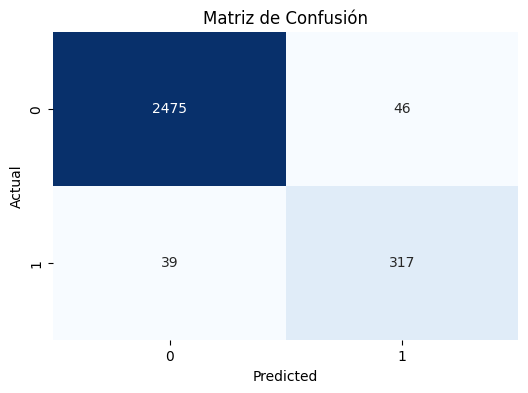

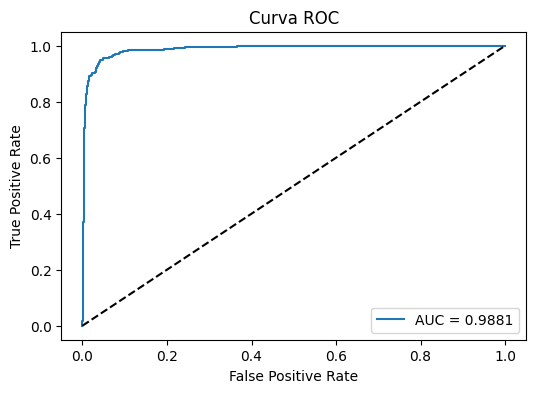

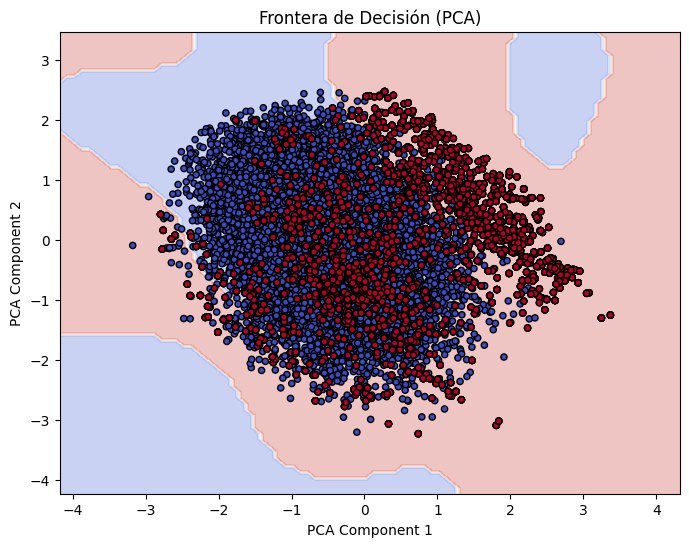

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.decomposition import PCA
import shap

# Inicializar el modelo con los mejores parámetros
mejor_modelo_svm = SVC(**mejores_parametrosSVM, probability=True)
mejor_modelo_svm.fit(X_train_preprocesado, y_train)

# Realizar predicciones y calcular métricas
y_pred = mejor_modelo_svm.predict(X_test_preprocesado)
y_prob = mejor_modelo_svm.predict_proba(X_test_preprocesado)[:, 1]  # Probabilidad de la clase positiva

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Imprimir métricas
print("\nMétricas de Clasificación:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# Matriz de confusión visualizada
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

# Frontera de decisión con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_preprocesado)
X_test_pca = pca.transform(X_test_preprocesado)

mejor_modelo_svm_pca = SVC(**mejores_parametrosSVM)
mejor_modelo_svm_pca.fit(X_train_pca, y_train)

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = mejor_modelo_svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap="coolwarm", s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Frontera de Decisión (PCA)")
plt.show()

# Explicabilidad con SHAP
explainer = shap.KernelExplainer(mejor_modelo_svm.predict, X_train_preprocesado[:100])  # Toma una muestra para mayor eficiencia
shap_values = explainer.shap_values(X_test_preprocesado[:100])

shap.summary_plot(shap_values, X_test_preprocesado[:100], feature_names=preprocessor.get_feature_names_out(), show=False)
plt.title("SHAP Summary Plot")
plt.show()


#KNN

#Definicion de diccionario de hyperparametros , combinaciones de hyperparametros, impresion de los mejores hyperparametros

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

# Definir el diccionario de hiperparámetros para el modelo KNN
param_distKNN = {
    "n_neighbors": [3, 5, 7, 9, 11],  # Número de vecinos a considerar
    "weights": ["uniform", "distance"],  # Tipo de peso aplicado a los vecinos
    "metric": ["euclidean", "manhattan", "minkowski"],  # Métrica de distancia
    "p": [1, 2]  # Parámetro de distancia para minkowski (p=1 es manhattan, p=2 es euclidean)
}

# Generar las combinaciones aleatorias de hiperparámetros
n_iter_search = 50
param_list = list(ParameterSampler(param_distKNN, n_iter=n_iter_search, random_state=42))

# Inicializar variables para almacenar los mejores resultados
mejor_score = 0
mejores_parametrosKNN = None

# Barra de progreso
pbar = tqdm(total=n_iter_search, desc="RandomizedSearchCV Progress")

# Ciclo manual sobre cada combinación de hiperparámetros
for i, params in enumerate(param_list):
    start = time.time()

    # Crear y ajustar el modelo KNN con la combinación actual de hiperparámetros
    modelo = KNeighborsClassifier(**params)
    modelo.fit(X_train_preprocesado, y_train)

    # Realizar predicciones en el conjunto de prueba y calcular la exactitud
    y_pred = modelo.predict(X_test_preprocesado)
    score = accuracy_score(y_test, y_pred)

    # Verificar si este es el mejor score
    if score > mejor_score:
        mejor_score = score
        mejores_parametrosKNN = params

    # Tiempo transcurrido para esta combinación
    elapsed = time.time() - start
    print(f"\nParámetros probados ({i + 1}/{n_iter_search}): {params}")
    print(f"Tiempo para esta combinación: {elapsed:.2f} segundos")
    print(f"Exactitud obtenida: {score:.4f}")

    # Actualizar barra de progreso
    pbar.update(1)

pbar.close()

# Imprimir los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(mejores_parametrosKNN)

# Mejor puntaje obtenido
print("\nMejor puntaje obtenido:")
print(mejor_score)

RandomizedSearchCV Progress:   4%|▍         | 2/50 [00:00<00:11,  4.35it/s]


Parámetros probados (1/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 3, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.32 segundos
Exactitud obtenida: 0.9246

Parámetros probados (2/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.17 segundos
Exactitud obtenida: 0.9131


RandomizedSearchCV Progress:   6%|▌         | 3/50 [00:03<01:07,  1.44s/it]


Parámetros probados (3/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.87 segundos
Exactitud obtenida: 0.8735


RandomizedSearchCV Progress:  10%|█         | 5/50 [00:06<01:00,  1.33s/it]


Parámetros probados (4/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.86 segundos
Exactitud obtenida: 0.9211

Parámetros probados (5/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.16 segundos
Exactitud obtenida: 0.8922


RandomizedSearchCV Progress:  12%|█▏        | 6/50 [00:06<00:41,  1.07it/s]


Parámetros probados (6/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 9, 'metric': 'minkowski'}
Tiempo para esta combinación: 0.15 segundos
Exactitud obtenida: 0.8829


RandomizedSearchCV Progress:  14%|█▍        | 7/50 [00:09<01:07,  1.57s/it]


Parámetros probados (7/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.87 segundos
Exactitud obtenida: 0.9013


RandomizedSearchCV Progress:  16%|█▌        | 8/50 [00:12<01:24,  2.02s/it]


Parámetros probados (8/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 7, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.97 segundos
Exactitud obtenida: 0.8954


RandomizedSearchCV Progress:  18%|█▊        | 9/50 [00:12<01:00,  1.47s/it]


Parámetros probados (9/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 9, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.28 segundos
Exactitud obtenida: 0.8829


RandomizedSearchCV Progress:  22%|██▏       | 11/50 [00:15<00:53,  1.37s/it]


Parámetros probados (10/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.86 segundos
Exactitud obtenida: 0.8916

Parámetros probados (11/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'metric': 'minkowski'}
Tiempo para esta combinación: 0.14 segundos
Exactitud obtenida: 0.9044


RandomizedSearchCV Progress:  24%|██▍       | 12/50 [00:15<00:37,  1.00it/s]


Parámetros probados (12/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'metric': 'minkowski'}
Tiempo para esta combinación: 0.15 segundos
Exactitud obtenida: 0.8895


RandomizedSearchCV Progress:  28%|██▊       | 14/50 [00:18<00:40,  1.13s/it]


Parámetros probados (13/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.84 segundos
Exactitud obtenida: 0.9093

Parámetros probados (14/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.16 segundos
Exactitud obtenida: 0.9263


RandomizedSearchCV Progress:  32%|███▏      | 16/50 [00:21<00:40,  1.20s/it]


Parámetros probados (15/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 9, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.86 segundos
Exactitud obtenida: 0.8811

Parámetros probados (16/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.15 segundos
Exactitud obtenida: 0.8839


RandomizedSearchCV Progress:  34%|███▍      | 17/50 [00:22<00:30,  1.08it/s]


Parámetros probados (17/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 7, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.28 segundos
Exactitud obtenida: 0.8895


RandomizedSearchCV Progress:  36%|███▌      | 18/50 [00:22<00:23,  1.37it/s]


Parámetros probados (18/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.27 segundos
Exactitud obtenida: 0.9044


RandomizedSearchCV Progress:  38%|███▊      | 19/50 [00:25<00:43,  1.40s/it]


Parámetros probados (19/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 3, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.97 segundos
Exactitud obtenida: 0.9284


RandomizedSearchCV Progress:  42%|████▏     | 21/50 [00:25<00:22,  1.26it/s]


Parámetros probados (20/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.29 segundos
Exactitud obtenida: 0.9044

Parámetros probados (21/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'minkowski'}
Tiempo para esta combinación: 0.14 segundos
Exactitud obtenida: 0.9263


RandomizedSearchCV Progress:  44%|████▍     | 22/50 [00:25<00:16,  1.66it/s]


Parámetros probados (22/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.16 segundos
Exactitud obtenida: 0.8839


RandomizedSearchCV Progress:  48%|████▊     | 24/50 [00:28<00:24,  1.06it/s]


Parámetros probados (23/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 9, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.87 segundos
Exactitud obtenida: 0.8811

Parámetros probados (24/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 11, 'metric': 'minkowski'}
Tiempo para esta combinación: 0.16 segundos
Exactitud obtenida: 0.8735


RandomizedSearchCV Progress:  50%|█████     | 25/50 [00:31<00:37,  1.52s/it]


Parámetros probados (25/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.85 segundos
Exactitud obtenida: 0.9211


RandomizedSearchCV Progress:  54%|█████▍    | 27/50 [00:34<00:32,  1.39s/it]


Parámetros probados (26/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.86 segundos
Exactitud obtenida: 0.8735

Parámetros probados (27/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 9, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.16 segundos
Exactitud obtenida: 0.8922


RandomizedSearchCV Progress:  56%|█████▌    | 28/50 [00:37<00:40,  1.85s/it]


Parámetros probados (28/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.93 segundos
Exactitud obtenida: 0.9211


RandomizedSearchCV Progress:  58%|█████▊    | 29/50 [00:38<00:28,  1.38s/it]


Parámetros probados (29/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.25 segundos
Exactitud obtenida: 0.8992


RandomizedSearchCV Progress:  60%|██████    | 30/50 [00:40<00:36,  1.84s/it]


Parámetros probados (30/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.91 segundos
Exactitud obtenida: 0.8954


RandomizedSearchCV Progress:  62%|██████▏   | 31/50 [00:43<00:40,  2.15s/it]


Parámetros probados (31/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.87 segundos
Exactitud obtenida: 0.9121


RandomizedSearchCV Progress:  64%|██████▍   | 32/50 [00:44<00:28,  1.59s/it]


Parámetros probados (32/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.29 segundos
Exactitud obtenida: 0.8735


RandomizedSearchCV Progress:  68%|██████▊   | 34/50 [00:47<00:22,  1.43s/it]


Parámetros probados (33/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.87 segundos
Exactitud obtenida: 0.9121

Parámetros probados (34/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 9, 'metric': 'minkowski'}
Tiempo para esta combinación: 0.16 segundos
Exactitud obtenida: 0.8922


RandomizedSearchCV Progress:  70%|███████   | 35/50 [00:47<00:15,  1.05s/it]


Parámetros probados (35/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.15 segundos
Exactitud obtenida: 0.8992


RandomizedSearchCV Progress:  72%|███████▏  | 36/50 [00:50<00:22,  1.61s/it]


Parámetros probados (36/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 9, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.91 segundos
Exactitud obtenida: 0.8811


RandomizedSearchCV Progress:  74%|███████▍  | 37/50 [00:53<00:25,  2.00s/it]


Parámetros probados (37/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.89 segundos
Exactitud obtenida: 0.9013


RandomizedSearchCV Progress:  76%|███████▌  | 38/50 [00:55<00:27,  2.25s/it]


Parámetros probados (38/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.85 segundos
Exactitud obtenida: 0.9319


RandomizedSearchCV Progress:  78%|███████▊  | 39/50 [00:58<00:26,  2.44s/it]


Parámetros probados (39/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.87 segundos
Exactitud obtenida: 0.8916


RandomizedSearchCV Progress:  80%|████████  | 40/50 [01:01<00:25,  2.58s/it]


Parámetros probados (40/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.93 segundos
Exactitud obtenida: 0.9093


RandomizedSearchCV Progress:  84%|████████▍ | 42/50 [01:04<00:15,  1.95s/it]


Parámetros probados (41/50): {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'metric': 'minkowski'}
Tiempo para esta combinación: 3.03 segundos
Exactitud obtenida: 0.9121

Parámetros probados (42/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.16 segundos
Exactitud obtenida: 0.9263


RandomizedSearchCV Progress:  86%|████████▌ | 43/50 [01:07<00:15,  2.23s/it]


Parámetros probados (43/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.86 segundos
Exactitud obtenida: 0.9319


RandomizedSearchCV Progress:  90%|█████████ | 45/50 [01:08<00:05,  1.20s/it]


Parámetros probados (44/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.28 segundos
Exactitud obtenida: 0.9246

Parámetros probados (45/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'metric': 'minkowski'}
Tiempo para esta combinación: 0.15 segundos
Exactitud obtenida: 0.9131


RandomizedSearchCV Progress:  92%|█████████▏| 46/50 [01:11<00:06,  1.69s/it]


Parámetros probados (46/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.86 segundos
Exactitud obtenida: 0.8916


RandomizedSearchCV Progress:  94%|█████████▍| 47/50 [01:14<00:06,  2.05s/it]


Parámetros probados (47/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 9, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.87 segundos
Exactitud obtenida: 0.9013


RandomizedSearchCV Progress:  96%|█████████▌| 48/50 [01:16<00:04,  2.30s/it]


Parámetros probados (48/50): {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan'}
Tiempo para esta combinación: 2.90 segundos
Exactitud obtenida: 0.9319


RandomizedSearchCV Progress:  98%|█████████▊| 49/50 [01:19<00:02,  2.47s/it]


Parámetros probados (49/50): {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'metric': 'minkowski'}
Tiempo para esta combinación: 2.86 segundos
Exactitud obtenida: 0.9093


RandomizedSearchCV Progress: 100%|██████████| 50/50 [01:20<00:00,  1.60s/it]


Parámetros probados (50/50): {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'metric': 'euclidean'}
Tiempo para esta combinación: 0.31 segundos
Exactitud obtenida: 0.8895

Mejores hiperparámetros encontrados:
{'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'minkowski'}

Mejor puntaje obtenido:
0.9318734793187348


#Inicializacion de el entrenamiento con los mejores hiperparametros, metricas de evaluacion y explicabilidad.


Métricas de Clasificación:
Accuracy: 0.9319
Precision: 0.6878
Recall: 0.8230
F1 Score: 0.7494
Specificity: 0.9472
AUC: 0.9096


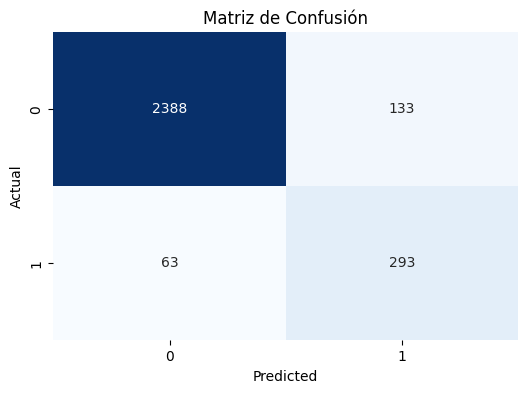

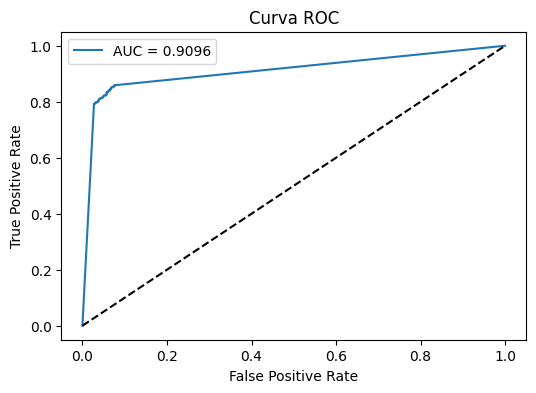

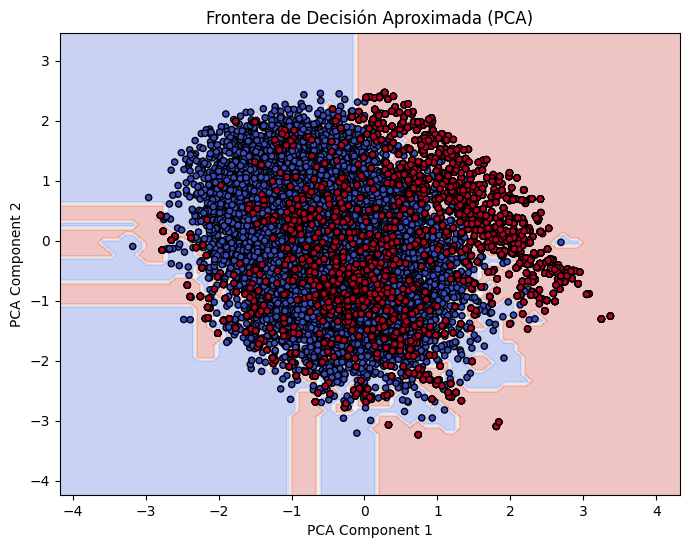

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.decomposition import PCA
import shap

# Inicializar el modelo KNN con los mejores parámetros
mejor_modelo_knn = KNeighborsClassifier(**mejores_parametrosKNN)
mejor_modelo_knn.fit(X_train_preprocesado, y_train)

# Realizar predicciones y calcular métricas
y_pred = mejor_modelo_knn.predict(X_test_preprocesado)

# Verificar si se pueden calcular probabilidades para AUC y ROC
try:
    y_prob = mejor_modelo_knn.predict_proba(X_test_preprocesado)[:, 1]  # Probabilidad de la clase positiva
    auc_score = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
except AttributeError:
    y_prob = None
    auc_score = None
    fpr, tpr = None, None

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Imprimir métricas
print("\nMétricas de Clasificación:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
if auc_score is not None:
    print(f"AUC: {auc_score:.4f}")

# Matriz de confusión visualizada
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC (si es posible calcularla)
if auc_score is not None:
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend()
    plt.show()

# Frontera de decisión aproximada con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_preprocesado)
X_test_pca = pca.transform(X_test_preprocesado)

mejor_modelo_knn_pca = KNeighborsClassifier(**mejores_parametrosKNN)
mejor_modelo_knn_pca.fit(X_train_pca, y_train)

# Crear un grid para la visualización de la frontera de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = mejor_modelo_knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap="coolwarm", s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Frontera de Decisión Aproximada (PCA)")
plt.show()

# Explicabilidad con SHAP
explainer = shap.KernelExplainer(mejor_modelo_knn.predict, X_train_preprocesado[:100])  # Toma una muestra para mayor eficiencia
shap_values = explainer.shap_values(X_test_preprocesado[:100])

shap.summary_plot(shap_values, X_test_preprocesado[:100], feature_names=preprocessor.get_feature_names_out(), show=False)
plt.title("SHAP Summary Plot")
plt.show()